# **EXPLORATORY DATA ANALYSIS**

## 1. PROBLEM STATEMENT

A retail company “ABC Private Limited” wants to understand the customer purchase
behaviour (specifically, purchase amount) against various products of different categories.
They have shared purchase summary of various customers for selected high
volume products from last month.
The data set also contains customer demographics (age, gender, marital status,
city_type, stay_in_current_city), product details (product_id and product category) and
Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against
various products which will help them to create personalized offer for customers against
different products.

## 2. IMPORTING THE LIBRARIES AND THE DATASET

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm

In [6]:
path = 'data\-train.csv'
data = pd.read_csv(path)

## 3. BASIC EDA

In [7]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
data.shape

(550068, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### 3.(i) Checking the cardinality of the dataset

In [12]:
for col in data.columns:
    print(data[col].value_counts())

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64
Gender
M    414259
F    135809
Name: count, dtype: int64
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64
City_Category
B    231173
C    171175
A

In [13]:
for col in data.columns:
    print(col, data[col].nunique())

User_ID 5891
Product_ID 3631
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 20
Product_Category_2 17
Product_Category_3 15
Purchase 18105


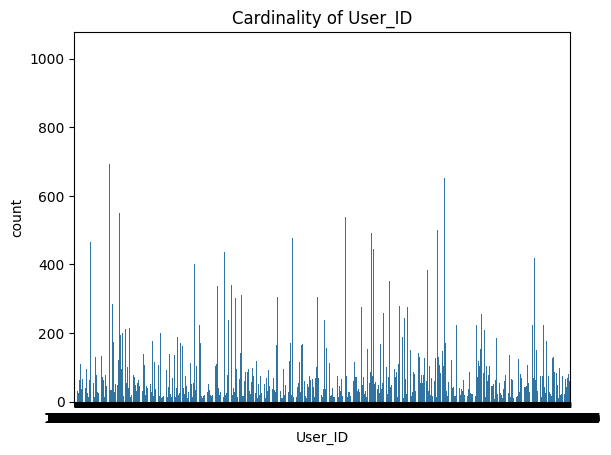

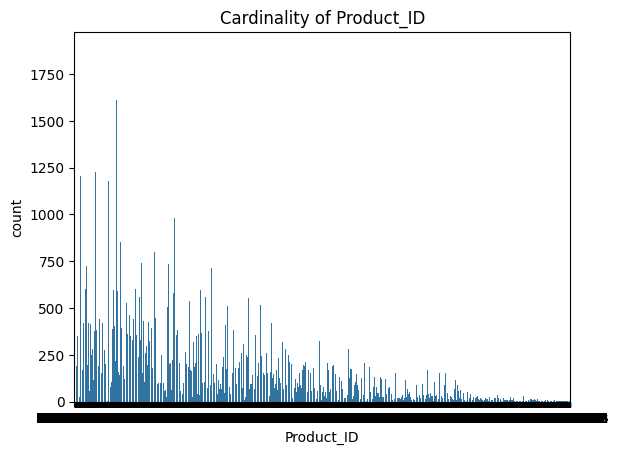

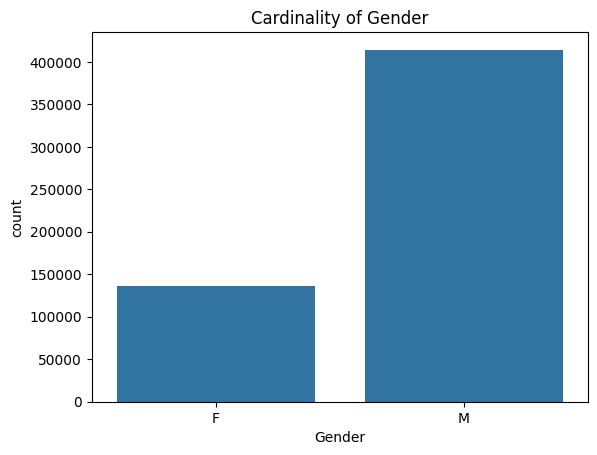

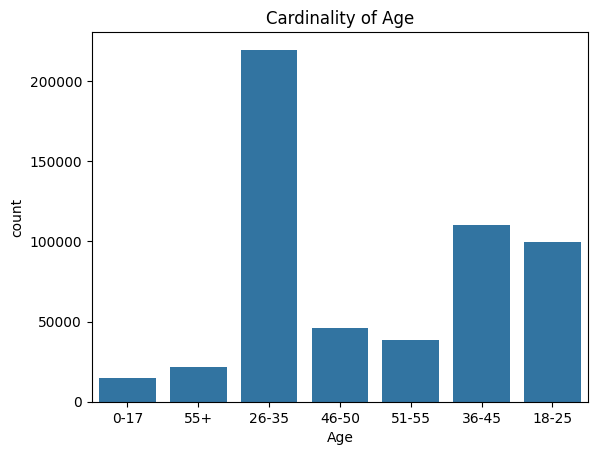

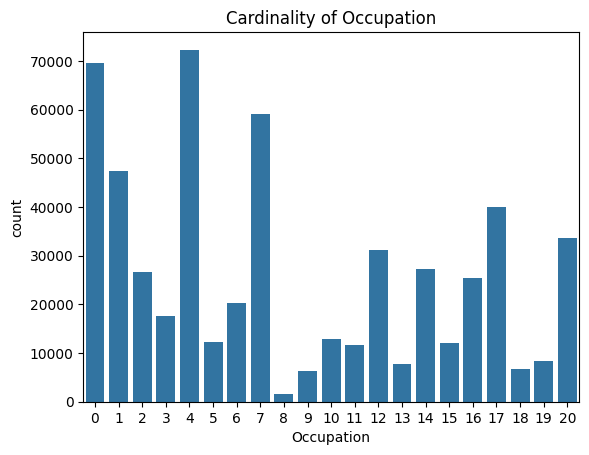

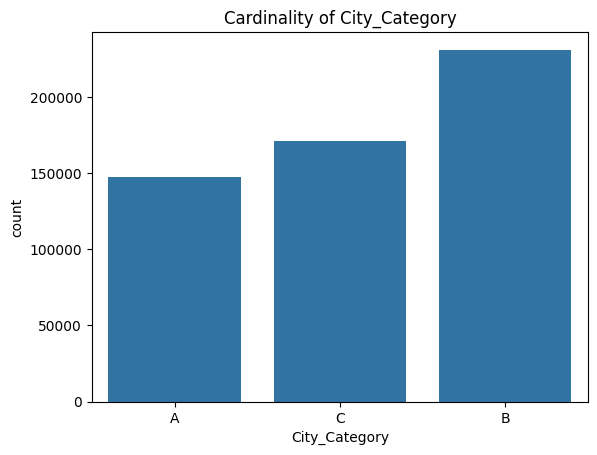

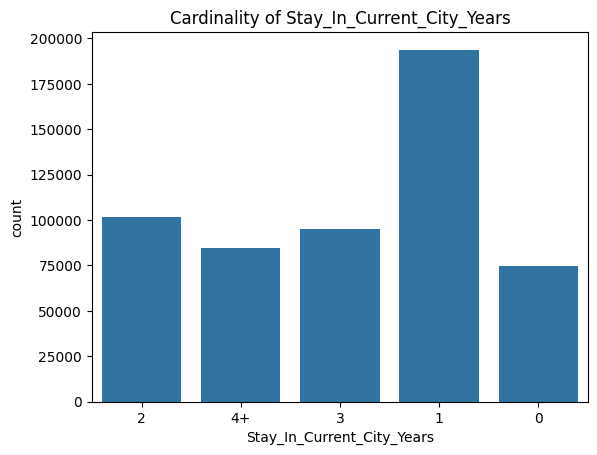

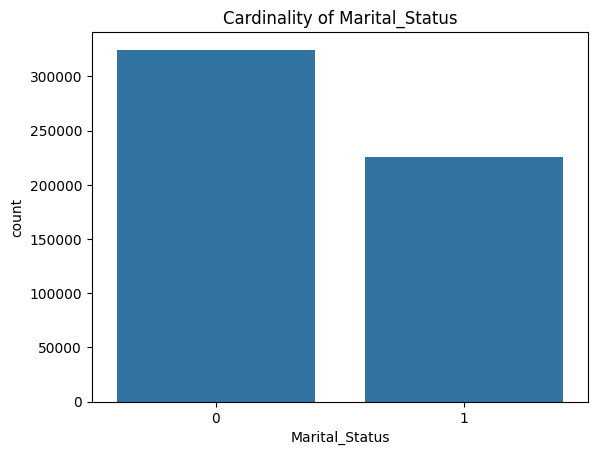

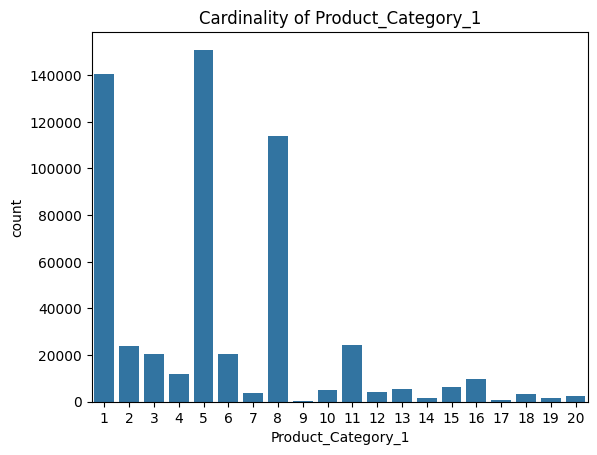

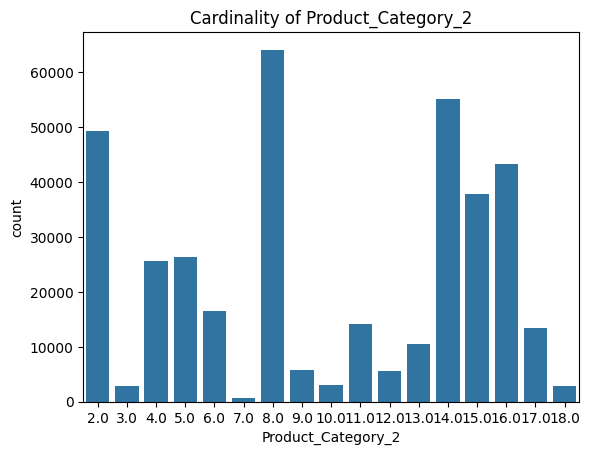

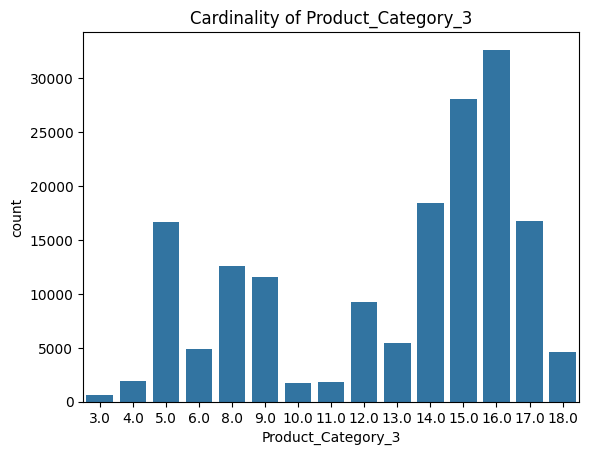

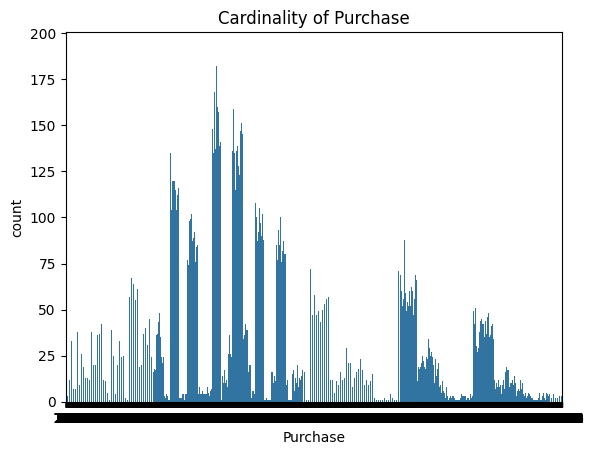

In [14]:
for col in data.columns:
    sns.countplot(x=data[col], data=data)
    plt.title(f"Cardinality of {col}")
    plt.show() 

### 3.(i) CONCLUSION:
The columns like User_ID, Product_ID, Occupation, Product_Category_1,2,3 have high cardinality hence it cannot be encoded using one hot encoding technique

In [15]:
data.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


### 3 (ii) checking avg and total spending of categories in the categorical column with respect to Purchase amount

In [16]:
def plot_spendings(group_column, colors=None, target_column='Purchase'):
    spending_by_category = data.groupby(group_column)[target_column].mean()
    print(spending_by_category)
    spending_by_category.plot(kind='bar', color=colors)
    plt.title(f'Average Spending by {group_column}')
    plt.xlabel(group_column)
    plt.ylabel(f'Average {target_column} Amount')
    plt.show()

    spending_by_category = data.groupby(group_column)[target_column].sum()
    print(spending_by_category)
    spending_by_category.plot(kind='bar', color=colors)
    plt.title(f'Total Spending by {group_column}')
    plt.xlabel(group_column)
    plt.ylabel(f'Total {target_column} Amount')
    plt.show()

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64


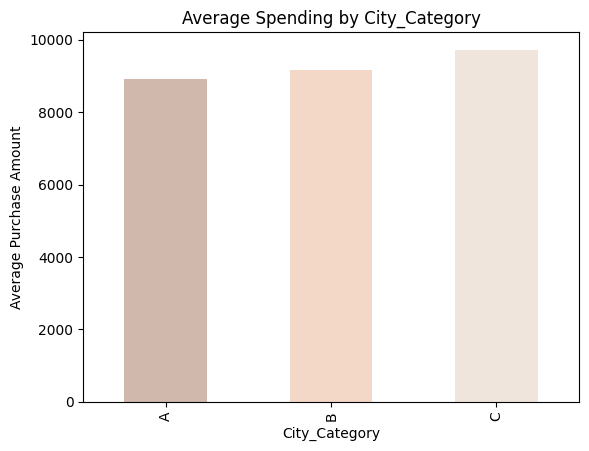

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64


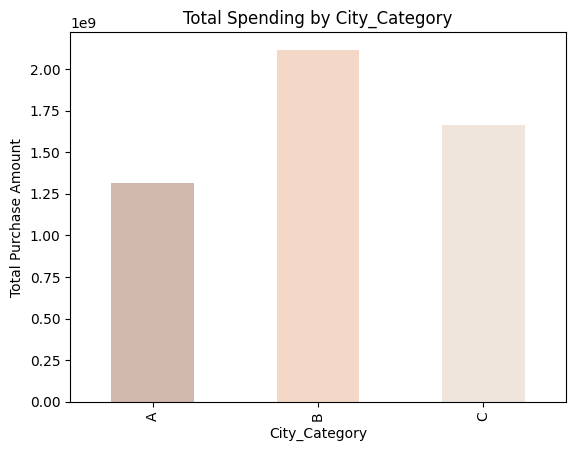

In [17]:
plot_spendings('City_Category',colors=["#d0b8ac","#f3d8c7","#efe5dc"])

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


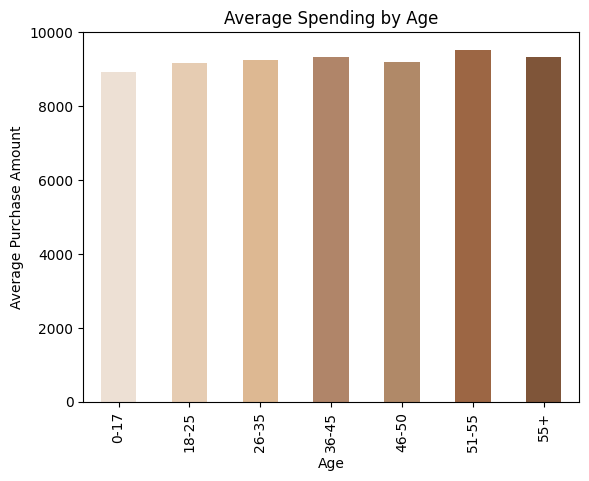

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64


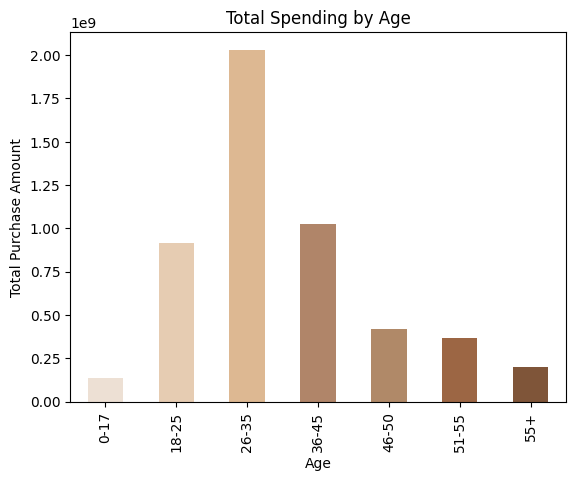

In [18]:
plot_spendings('Age',colors=["#EDE0D4","#E6CCB2","#DDB892","#B08569","#B08968","#9C6644","#7F5539"])

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


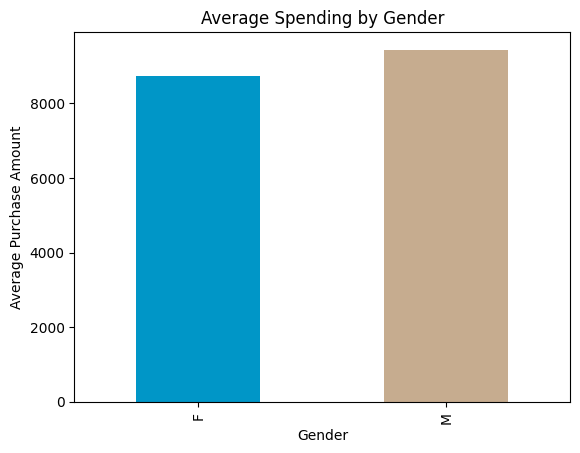

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64


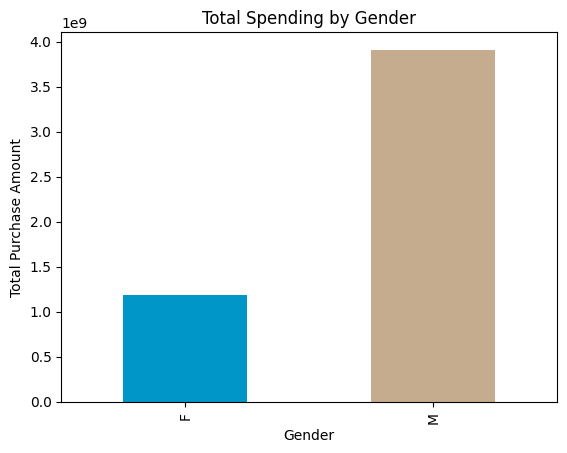

In [19]:
plot_spendings('Gender',colors=['#0096c7', '#c6ac8f'])

### 3 (ii) Conclusion:

#### City Category:
| CATEGORY | AVERAGE SPENDING | TOTAL SPENDING |
| ----|----|----|
| A | 8,911.94 | 1,316,471,661 |
| B | 9,151.30 | 2,115,533,605 |
| C | 9,719.92 | 1,663,807,476 |

- The average spending per record in City Category follows the order: C > B > A.
- However, when considering the total spending, City Category B records the highest total spending, surpassing both A and C.

#### Age Groups:
| AGE GROUPS | AVERAGE SPENDING | TOTAL SPENDING |
|------------|------------------|---------------|
| 0-17       | 8,933.46 | 134,913,183  |
| 18-25      | 9,169.66 | 913,848,675  |
| 26-35      | 9,252.69 | 2,031,770,578  |
| 36-45      | 9,331.35 | 1,026,569,884  |
| 46-50      | 9,208.63 | 420,843,403  |
| 51-55      | 9,534.81 | 367,099,644  |
| 55+        | 9,336.28 | 200,767,375  |

- Across different age groups, the average spending per record is quite consistent, rangng from aproximately $8,933 to $9,534.
- There is no significant variation in the spending patterns among different age groups.

#### Gender:
| Gender | Average Spending | Total Spending |
|--------|------------------:|---------------:|
| F      | 8,734.57 | 1,186,232,642  |
| M      | 9,437.53 | 3,909,580,100  |

- On average, males tend to spend more than femal s, with an average spending of $9,437 compared to $8,734 for females.
- The total spending by males significantly exceeds that of females, indicating a substantial difference in overall spending between the two genders.

These conclusions, along with the provided tables, offer valuable insights into the spending patterns based on city category, age groups, and gender. The findings can be instrumental in shaping marketing strategies and tailoring promotions to specific demographic segments.
 |





 
 
7673759336.280459

## 4. OUTLIER DETECTION AND DELETION

In [20]:
def outlier(target):
    target = data[target]
    Q1 = target.quantile(0.25)
    Q3 = target.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (target < lower_bound) | (target > upper_bound)
    return outliers




def outlier_count(target):
    outliers = outlier(target)
    num_outliers = outliers.sum()
    print(f'Number of outliers in the target column: {num_outliers}')    



def plot_outlier(column):
    sns.boxplot(y=data[column])
    plt.title('Boxplot for Outlier Detection')
    plt.xlabel(column)
    plt.show()
    outlier_count(column)

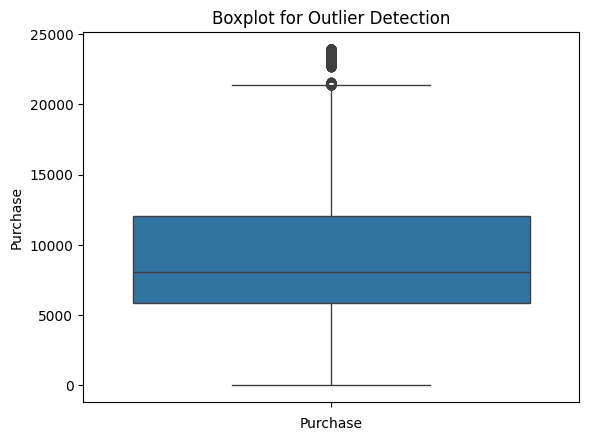

Number of outliers in the target column: 2677


In [21]:
plot_outlier('Purchase')

In [22]:
outliers = outlier('Purchase')
data = data[~outliers]
data.shape

(547391, 12)

### exploring the product_id,user_ID,occupation with respect to its total purchase amount

In [23]:
prod_purch = data.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False)
print(prod_purch)

Product_ID
P00025442    27995166
P00110742    26722309
P00255842    25168963
P00059442    24338343
P00184942    24334887
               ...   
P00012942        1717
P00325342        1656
P00353042        1545
P00309042         726
P00091742         405
Name: Purchase, Length: 3631, dtype: int64


In [24]:
user_purch = data.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False)
print(user_purch)

User_ID
1004277    10422059
1001680     8652917
1002909     7418991
1001941     6817493
1005831     6489130
             ...   
1004991       52371
1005117       49668
1003883       49349
1000094       49288
1004464       46681
Name: Purchase, Length: 5891, dtype: int64


In [25]:
occu_purch = data.groupby('Occupation')['Purchase'].sum().sort_values(ascending=False)
occu_purch

Occupation
4     660013132
0     627775761
7     551375445
1     418737985
17    388932155
12    301184378
20    291755101
14    256289900
16    235566051
2     234467625
6     186221551
3     160095937
15    117130782
10    114869283
5     112633901
11    104746266
19     72576724
13     70491160
18     60104973
9      54037005
8      14598451
Name: Purchase, dtype: int64

## CHECKING THE NULL VALUES AND FILLING THEM

In [26]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173226
Product_Category_3            381211
Purchase                           0
dtype: int64

In [27]:
def plot_null_pie(column_name):
    null_mask = data[column_name].isnull()

    null_count = null_mask.sum()
    not_null_count = len(data) - null_count
    labels = ['Null Values', 'Non-Null Values']
    sizes = [null_count, not_null_count]

# Create a pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['gray', 'lightblue'])
    plt.title(f'Distribution of Null and Non-Null Values in {column_name}')
    plt.show()

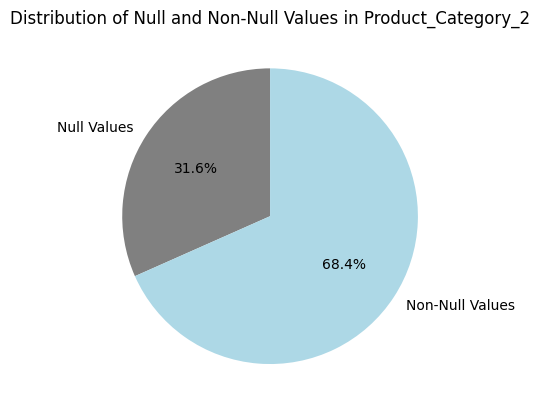

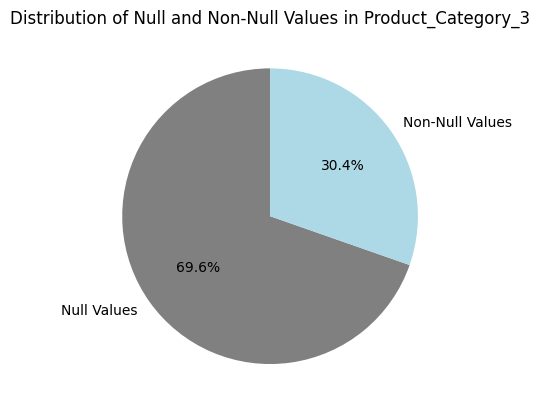

In [28]:
plot_null_pie('Product_Category_2')
plot_null_pie('Product_Category_3')

### Analysis of Null Values in Product Categories:

The dataset exhibits variations in the presence of null values among different product category columns. Specifically, the 'product_categor2_1' column has approximately 31.5% null values, while 'product_category_3' records nearly 69.5% null values.

#### 1. Relationship Between Null Values in 'product_category_2' and 'product_category_3':

We will investigate the intersection of null values between 'product_category_2' and 'product_category_3':

- How many records with null values in 'product_category_2' also have null values in 'product_category_3'?

#### 2. Examination of Null Values in 'product_category_2' and Corresponding Values in 'product_category_3':

Additionally, we will explore whether records with null values in 'product_category_2' contain non-null values in 'product_category_3':

- Do the null records in 'product_category_2' coincide with null values in 'product_category_3'?
- If the null records in 'product_category_2' are not null in 'product_category_3', what values do they hold?

These analyses aim to provide insights into the relationships between null values in different product category columns, helping to understand potential dependencies or patterns in the dataset.


In [29]:
both_null_count = len(data[data['Product_Category_2'].isnull() & data['Product_Category_3'].isnull()])
print(f"Number of rows where both 'Product_Category_2' and 'Product_Category_3' are null: {both_null_count}")

Number of rows where both 'Product_Category_2' and 'Product_Category_3' are null: 173226


In [30]:
dependent_records = data[data['Product_Category_2'].isnull() & data['Product_Category_2'].notnull()]
print(dependent_records)

Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase]
Index: []


### Conclusion:

The analysis of null values within the product category columns in the dataset has yielded insightful findings:

#### 1. Relationship Between Null Values in 'product_category_2' and 'product_category_3':

Upon investigating the intersection of null values between 'product_category_2' and 'product_category_3', it was observed that:

- The records that have null values in 'product_category_2' also exhibit null values in 'product_category_3'. Quantitatively, the number of rows where both 'Product_Category_2' and 'Product_Category_3' are null is 173,226.

#### 2. Examination of Null Values in 'product_category_2' and Corresponding Values in 'product_category_3':

In exploring records with null values in 'product_category_2' and comparing them with non-null values in 'product_category_3', it was found that:

- There were no instances where the null records in 'product_category_2' coincided with non-null values in 'product_category_3'. This implies that there is no evident relationship or substitution between these categories.

#### 3. Imputation Considerations:

Given that almost 70% of the data from 'product_category_3' is missing, imputing values may not be feasible. However, for the 30% null values in 'product_category_2', filling them with the median of that column is a viable option.

These analyses provide clarity on the relationships and possibilities concerning null values in different product category columns, guiding decisions on handling missing data in the dataset.


In [31]:
data.drop(
    columns=['Product_Category_3'],
    axis= 1,
    inplace=True
)

In [32]:
data['Product_Category_2'].fillna(data['Product_Category_2'].median(),inplace = True)

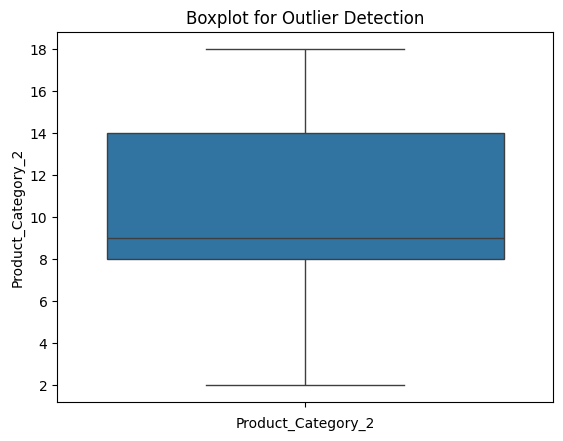

Number of outliers in the target column: 0


In [33]:
plot_outlier('Product_Category_2')

### Transforming columns

In [34]:
data['Product_ID'] = data['Product_ID'].str.extract('(\d+)')
from tqdm.auto import tqdm
label_encoders = {}
for column in tqdm(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']):
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

100%|██████████| 4/4 [00:00<00:00, 10.60it/s]


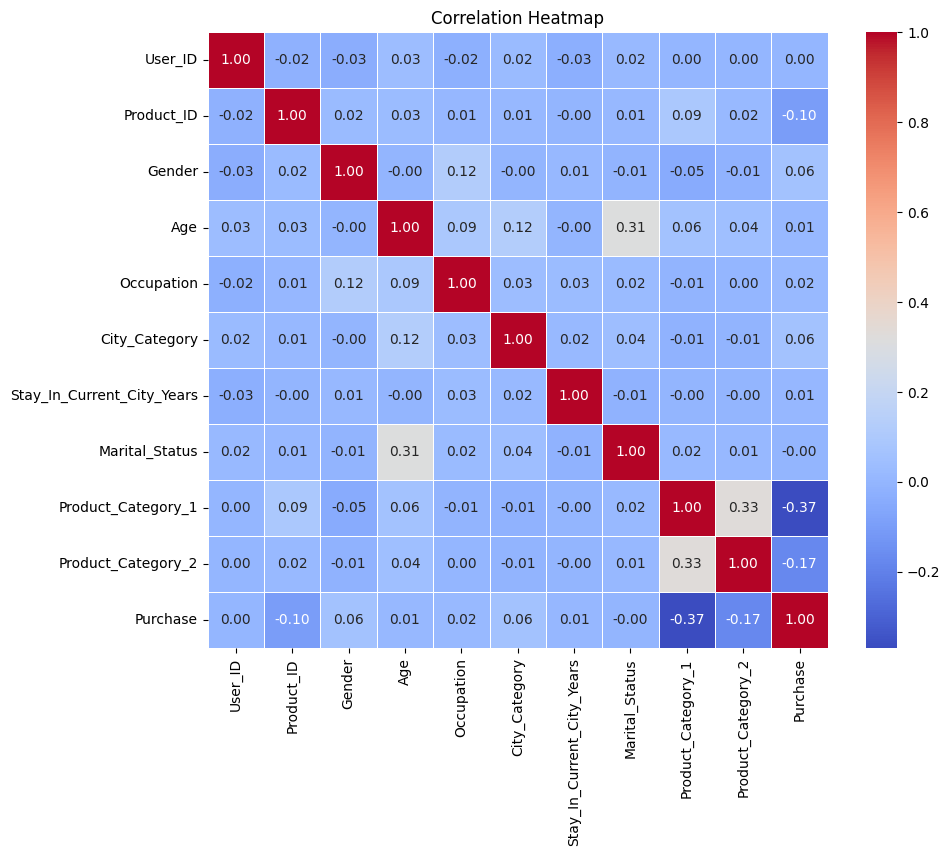

In [35]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


## Readiness for Column Transformation and Model Training:

After a thorough exploration of the dataset, it is evident that the data is now well-prepared to proceed with column transformation and initiate the model training process.

The exploratory analysis has provided insights into the structure, patterns, and relationships within the dataset. Key features, potential correlations, and characteristics of the data have been identified, paving the way for the next stages in the data science workflow.

This readiness signifies that the dataset is in a suitable state for implementing column transformations, such as handling missing values, encoding categorical variables, and scaling features. Following these transformations, the data will be poised for model training, enabling the development of predictive models and further analysis.

The groundwork laid in the exploration phase establishes a solid foundation for the subsequent steps in the data science pipeline, ensuring that the dataset is prepared and optimized for the upcoming tasks of feature engineering and model development.
